In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 24s 30ms/step - loss: 0.6450 - accuracy: 0.7940 - val_loss: 0.4552 - val_accuracy: 0.8605
Epoch 2/30
750/750 [==============================] - 23s 31ms/step - loss: 0.4121 - accuracy: 0.8715 - val_loss: 0.3948 - val_accuracy: 0.8703
Epoch 3/30
750/750 [==============================] - 23s 31ms/step - loss: 0.3512 - accuracy: 0.8873 - val_loss: 0.3478 - val_accuracy: 0.8869
Epoch 4/30
750/750 [==============================] - 24s 31ms/step - loss: 0.3171 - accuracy: 0.8981 - val_loss: 0.3159 - val_accuracy: 0.8985
Epoch 5/30
750/750 [==============================] - 23s 31ms/step - loss: 0.2904 - accuracy: 0.9069 - val_loss: 0.3163 - val_accuracy: 0.8958
Epoch 6/30
750/750 [==============================] - 24s 32ms/step - loss: 0.2734 - accuracy: 0.9125 - val_loss: 0.3142 - val_accuracy: 0.9005
Epoch 7/30
750/750 [==============================] - 24s 32ms/step - loss: 0.2587 - accuracy: 0.9176 - val_loss: 0.2953 - val_accuracy:

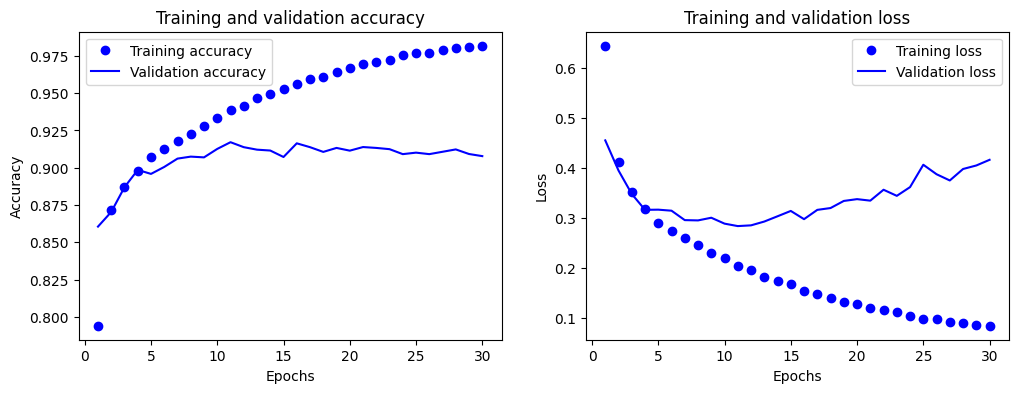

In [5]:
epochs = range(1, 31)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [6]:
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
true_labels = tf.argmax(test_labels, axis=1).numpy()

313/313 [==============================] - 2s 7ms/step


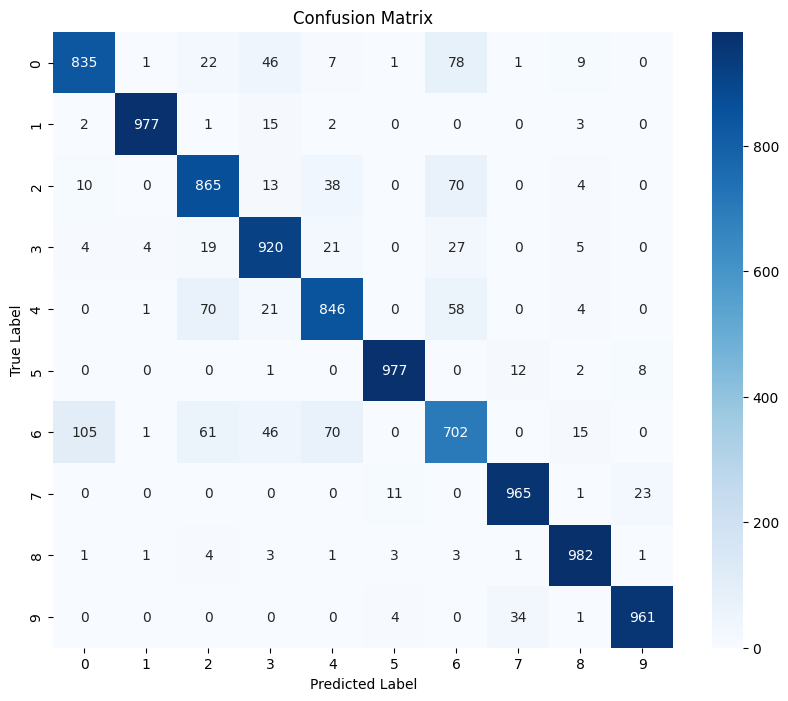

In [7]:
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.86      0.85      1000
           3       0.86      0.92      0.89      1000
           4       0.86      0.85      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.70      0.72      1000
           7       0.95      0.96      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



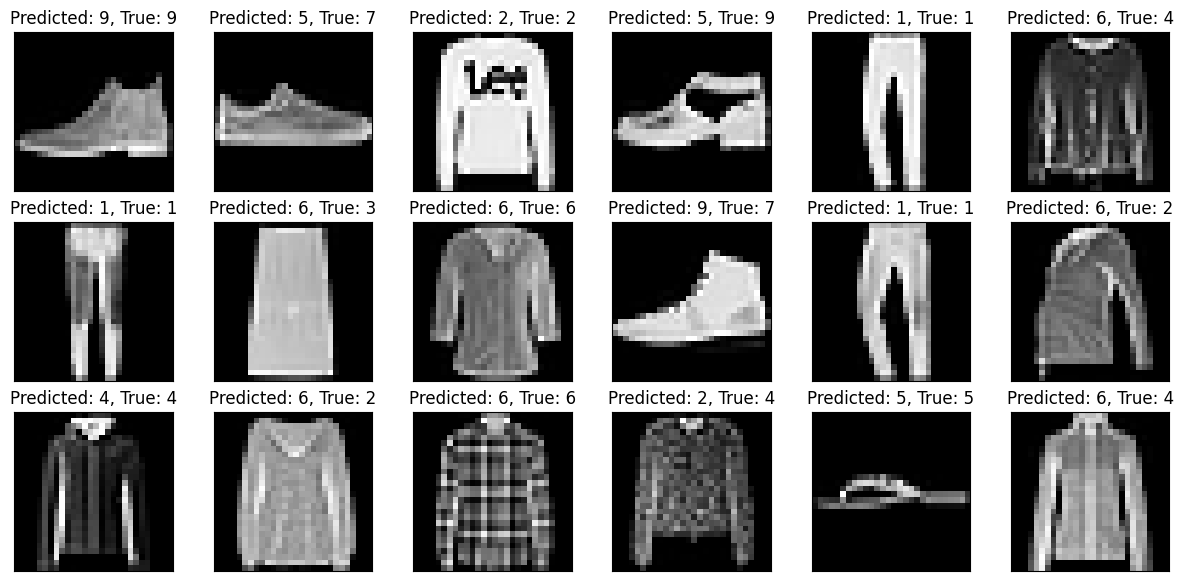

In [9]:
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

plt.figure(figsize=(15, 7))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 6, 2*i + 1)
    plt.imshow(test_images[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {predicted_labels[correct]}, True: {true_labels[correct]}")
    plt.xticks([])
    plt.yticks([])

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 6, 2*i + 2)
    plt.imshow(test_images[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {predicted_labels[incorrect]}, True: {true_labels[incorrect]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.4528 - accuracy: 0.9030
Test accuracy: 0.902999997138977
